In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data_full = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data_full = data_full.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data_full[field].mean(), data_full[field].std()
    data_full.loc[:,field] = (data_full[field]-mean)/std

# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data_full.index, size=int(len(data_full)*0.9), replace=False)
data, test_data = data_full.iloc[sample], data_full.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [26]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'aqua', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

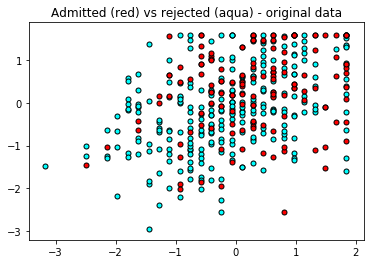

In [28]:
plt.title("Admitted (red) vs rejected (aqua) - original data")
plot_points(np.array(data_full[['gre', 'gpa']]), np.array(data_full['admit']))
plt.show()

In [31]:
import numpy as np
from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return (1 - 1/sigmoid(x))


# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Calculate the output
        output = sigmoid(np.dot(x, weights))

        # Calculate the error
        error = y - output

        # Calculate the error term
        error_term = error * output * (1 - output)

        # Calculate the change in weights for this sample and add it to the total weight change
        del_w += error_term * x  # accumulating error for each data point

    # Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records    # the magic of gradient descent happens here

    # Printing out the mean square error on the training set
#     if e % (epochs / 10) == 0:
    if e % 40 == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.2627609384996635
Train loss:  0.22805408803546176
Train loss:  0.21337877168621391
Train loss:  0.20640957578762922
Train loss:  0.20283359948145654
Train loss:  0.20084292908073426
Train loss:  0.19965237864766358
Train loss:  0.19889704649582163
Train loss:  0.19839437409384728
Train loss:  0.19804667396363998
Train loss:  0.1977985139668603
Train loss:  0.19761680473555035
Train loss:  0.1974809134278261
Train loss:  0.19737748294982918
Train loss:  0.19729758343267645
Train loss:  0.1972350774624106
Train loss:  0.19718564524753648
Train loss:  0.1971461830861291
Train loss:  0.19711442070342722
Train loss:  0.19708867115488232
Train loss:  0.19706766341315082
Train loss:  0.19705042790598762
Train loss:  0.19703621677464653
Train loss:  0.19702444738422745
Train loss:  0.1970146617015267
Prediction accuracy: 0.725
